<a href="https://colab.research.google.com/github/janhavi25123/ggh_environmental_data_monitoring/blob/main/temperature_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import pandas as pd

weather = pd.read_csv("CHARLESTON_INTL_AIRPORT.csv", index_col="DATE")

In [106]:
weather

,STATION,NAME,ACMH,ACSH,AWND,DAEV,DAWM,EVAP,FMTM,MDEV,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV03
DATE,,,,,,,,,,,,,,,,,,,,,
1980-01-01,USW00013880,"CHARLESTON INTL. AIRPORT, SC US",90.0,100.0,NaN,NaN,NaN,0.05,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-02,USW00013880,"CHARLESTON INTL. AIRPORT, SC US",0.0,0.0,NaN,NaN,NaN,0.05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-03,USW00013880,"CHARLESTON INTL. AIRPORT, SC US",40.0,50.0,NaN,NaN,NaN,0.07,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-04,USW00013880,"CHARLESTON INTL. AIRPORT, SC US",100.0,100.0,NaN,NaN,NaN,0.01,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-05,USW00013880,"CHARLESTON INTL. AIRPORT, SC US",80.0,90.0,NaN,NaN,NaN,0.10,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-23,USW00013880,"CHARLESTON INTL. AIRPORT, SC US",NaN,NaN,8.72,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-24,USW00013880,"CHARLESTON INTL. AIRPORT, SC US",NaN,NaN,7.61,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-25,USW00013880,"CHARLESTON INTL. AIRPORT, SC US",NaN,NaN,6.71,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]
null_pct

STATION    0.000000
NAME       0.000000
ACMH       0.637875
ACSH       0.637875
AWND       0.092231
DAEV       0.999685
DAWM       0.999245
EVAP       0.597016
FMTM       0.360992
MDEV       0.999685
MDWM       0.999245
MNPN       0.576429
MXPN       0.576681
PGTM       0.324540
PRCP       0.000000
PSUN       0.911735
SN12       0.818434
SN32       0.780282
SN52       0.991123
SNOW       0.001889
SNWD       0.002015
SX12       0.818371
SX32       0.780408
SX52       0.991123
TAVG       0.805024
TMAX       0.000000
TMIN       0.000000
TSUN       0.547847
WDF1       0.637938
WDF2       0.362503
WDF5       0.364833
WDFG       0.641022
WDMV       0.562012
WESD       0.631390
WSF1       0.637938
WSF2       0.362503
WSF5       0.364770
WSFG       0.640834
WT01       0.502078
WT02       0.937484
WT03       0.844057
WT04       0.998426
WT05       0.977902
WT06       0.998300
WT07       0.995404
WT08       0.842546
WT09       0.997356
WT10       0.999811
WT11       0.998426
WT13       0.795329


In [108]:
valid_columns = weather.columns[null_pct < .05]

In [109]:
valid_columns

Index(['STATION', 'NAME', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN'], dtype='object')

In [110]:
weather = weather[valid_columns].copy()

In [111]:
weather.columns = weather.columns.str.lower()

In [112]:
weather

,station,name,prcp,snow,snwd,tmax,tmin
DATE,,,,,,,
1980-01-01,USW00013880,"CHARLESTON INTL. AIRPORT, SC US",0.02,0.0,0.0,47,38
1980-01-02,USW00013880,"CHARLESTON INTL. AIRPORT, SC US",0.00,0.0,0.0,56,34
1980-01-03,USW00013880,"CHARLESTON INTL. AIRPORT, SC US",0.00,0.0,0.0,60,32
1980-01-04,USW00013880,"CHARLESTON INTL. AIRPORT, SC US",0.15,0.0,0.0,47,37
1980-01-05,USW00013880,"CHARLESTON INTL. AIRPORT, SC US",0.00,0.0,0.0,47,35
...,...,...,...,...,...,...,...
2023-06-23,USW00013880,"CHARLESTON INTL. AIRPORT, SC US",0.97,0.0,0.0,85,71
2023-06-24,USW00013880,"CHARLESTON INTL. AIRPORT, SC US",0.00,0.0,0.0,89,72
2023-06-25,USW00013880,"CHARLESTON INTL. AIRPORT, SC US",0.00,0.0,0.0,93,72


In [113]:
weather = weather.ffill()

In [114]:
weather.apply(pd.isnull).sum()

station    0
name       0
prcp       0
snow       0
snwd       0
tmax       0
tmin       0
dtype: int64

In [115]:
weather.apply(lambda x: (x == 9999).sum())

station    0
name       0
prcp       0
snow       0
snwd       0
tmax       0
tmin       0
dtype: int64

In [116]:
weather.dtypes

station     object
name        object
prcp       float64
snow       float64
snwd       float64
tmax         int64
tmin         int64
dtype: object

In [117]:
weather.index

Index(['1980-01-01', '1980-01-02', '1980-01-03', '1980-01-04', '1980-01-05',
       '1980-01-06', '1980-01-07', '1980-01-08', '1980-01-09', '1980-01-10',
       ...
       '2023-06-18', '2023-06-19', '2023-06-20', '2023-06-21', '2023-06-22',
       '2023-06-23', '2023-06-24', '2023-06-25', '2023-06-26', '2023-06-27'],
      dtype='object', name='DATE', length=15884)

In [118]:
weather.index = pd.to_datetime(weather.index)

In [119]:
weather.index.year.value_counts().sort_index()

1980    366
1981    365
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    178
Name: DATE, dtype: int64

In [120]:
# weather["snwd"].plot()

In [121]:
weather["target"] = weather.shift(-1)["tmax"]

In [122]:
weather

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1980-01-01,USW00013880,"CHARLESTON INTL. AIRPORT, SC US",0.02,0.0,0.0,47,38,56.0
1980-01-02,USW00013880,"CHARLESTON INTL. AIRPORT, SC US",0.00,0.0,0.0,56,34,60.0
1980-01-03,USW00013880,"CHARLESTON INTL. AIRPORT, SC US",0.00,0.0,0.0,60,32,47.0
1980-01-04,USW00013880,"CHARLESTON INTL. AIRPORT, SC US",0.15,0.0,0.0,47,37,47.0
1980-01-05,USW00013880,"CHARLESTON INTL. AIRPORT, SC US",0.00,0.0,0.0,47,35,47.0
...,...,...,...,...,...,...,...,...
2023-06-23,USW00013880,"CHARLESTON INTL. AIRPORT, SC US",0.97,0.0,0.0,85,71,89.0
2023-06-24,USW00013880,"CHARLESTON INTL. AIRPORT, SC US",0.00,0.0,0.0,89,72,93.0
2023-06-25,USW00013880,"CHARLESTON INTL. AIRPORT, SC US",0.00,0.0,0.0,93,72,90.0


In [123]:
weather = weather.ffill()

In [124]:
weather

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1980-01-01,USW00013880,"CHARLESTON INTL. AIRPORT, SC US",0.02,0.0,0.0,47,38,56.0
1980-01-02,USW00013880,"CHARLESTON INTL. AIRPORT, SC US",0.00,0.0,0.0,56,34,60.0
1980-01-03,USW00013880,"CHARLESTON INTL. AIRPORT, SC US",0.00,0.0,0.0,60,32,47.0
1980-01-04,USW00013880,"CHARLESTON INTL. AIRPORT, SC US",0.15,0.0,0.0,47,37,47.0
1980-01-05,USW00013880,"CHARLESTON INTL. AIRPORT, SC US",0.00,0.0,0.0,47,35,47.0
...,...,...,...,...,...,...,...,...
2023-06-23,USW00013880,"CHARLESTON INTL. AIRPORT, SC US",0.97,0.0,0.0,85,71,89.0
2023-06-24,USW00013880,"CHARLESTON INTL. AIRPORT, SC US",0.00,0.0,0.0,89,72,93.0
2023-06-25,USW00013880,"CHARLESTON INTL. AIRPORT, SC US",0.00,0.0,0.0,93,72,90.0


In [125]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=.1)

In [126]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]

In [127]:
def backtest(weather, model, predictors, start=3650, step=90):
    all_predictions = []

    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]

        model.fit(train[predictors], train["target"])

        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)
        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()

        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [128]:
predictions = backtest(weather, rr, predictors)

In [129]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(predictions["actual"], predictions["prediction"])

4.643202810980907

In [130]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
2014-03-03,40.0,71.985666,31.985666
2014-01-06,33.0,63.779741,30.779741
2015-03-05,47.0,77.063023,30.063023
2013-12-07,49.0,77.747666,28.747666
1994-01-16,67.0,38.664350,28.335650
...,...,...,...
2011-07-14,87.0,86.997994,0.002006
2001-06-11,86.0,86.002001,0.002001
2008-01-08,76.0,76.000121,0.000121


In [131]:
pd.Series(rr.coef_, index=predictors)

prcp   -0.801330
snow   -0.049551
snwd    0.601267
tmax    0.730519
tmin    0.148212
dtype: float64

In [132]:
def pct_diff(old, new):
    return (new - old) / old

def compute_rolling(weather, horizon, col):
    label = f"rolling_{horizon}_{col}"
    weather[label] = weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
    return weather

rolling_horizons = [3, 14]
for horizon in rolling_horizons:
    for col in ["tmax", "tmin", "prcp"]:
        weather = compute_rolling(weather, horizon, col)

In [133]:
def expand_mean(df):
    return df.expanding(1).mean()

for col in ["tmax", "tmin", "prcp"]:
    weather[f"month_avg_{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
    weather[f"day_avg_{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)

In [134]:
weather = weather.iloc[14:,:]
weather = weather.fillna(0)

In [135]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]

In [136]:
predictions = backtest(weather, rr, predictors)
mean_absolute_error(predictions["actual"], predictions["prediction"])

4.2831406819858175

In [137]:
mean_squared_error(predictions["actual"], predictions["prediction"])

32.678207450925406

In [138]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
2014-03-03,40.0,71.187967,31.187967
2014-01-06,33.0,63.190229,30.190229
2022-12-23,32.0,60.396707,28.396707
2014-11-17,51.0,77.555813,26.555813
1994-01-18,31.0,57.552897,26.552897
...,...,...,...
1998-04-20,75.0,75.002079,0.002079
2008-05-02,82.0,82.001248,0.001248
2022-05-10,81.0,80.998835,0.001165


In [139]:
weather.loc["1990-03-07": "1990-03-17"]

,station,name,prcp,snow,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avg_tmax,day_avg_tmax,month_avg_tmin,day_avg_tmin,month_avg_prcp,day_avg_prcp
DATE,,,,,,,,,,,,,,,,,,,,,
1990-03-07,USW00013880,"CHARLESTON INTL. AIRPORT, SC US",0.00,0.0,0.0,56,46,55.0,66.333333,-0.155779,...,45.357143,0.014173,0.029286,-1.000000,68.271293,65.000000,46.646688,44.909091,0.135016,0.263636
1990-03-08,USW00013880,"CHARLESTON INTL. AIRPORT, SC US",0.00,0.0,0.0,55,40,69.0,61.333333,-0.103261,...,43.928571,-0.089431,0.009286,-1.000000,68.229560,62.363636,46.625786,42.272727,0.134591,0.106364
1990-03-09,USW00013880,"CHARLESTON INTL. AIRPORT, SC US",0.04,0.0,0.0,69,51,79.0,60.000000,0.150000,...,43.714286,0.166667,0.007143,4.600000,68.231975,67.090909,46.639498,44.727273,0.134295,0.160909
1990-03-10,USW00013880,"CHARLESTON INTL. AIRPORT, SC US",0.00,0.0,0.0,79,55,83.0,67.666667,0.167488,...,44.714286,0.230032,0.007143,-1.000000,68.265625,66.818182,46.665625,45.818182,0.133875,0.064545
1990-03-11,USW00013880,"CHARLESTON INTL. AIRPORT, SC US",0.00,0.0,0.0,83,54,88.0,77.000000,0.077922,...,45.857143,0.177570,0.007143,-1.000000,68.311526,67.090909,46.688474,43.454545,0.133458,0.017273
1990-03-12,USW00013880,"CHARLESTON INTL. AIRPORT, SC US",0.00,0.0,0.0,88,59,88.0,83.333333,0.056000,...,48.000000,0.229167,0.007143,-1.000000,68.372671,71.272727,46.726708,46.636364,0.133043,0.002727
1990-03-13,USW00013880,"CHARLESTON INTL. AIRPORT, SC US",0.00,0.0,0.0,88,60,80.0,86.333333,0.019305,...,49.857143,0.203438,0.007143,-1.000000,68.433437,70.636364,46.767802,45.818182,0.132632,0.264545
1990-03-14,USW00013880,"CHARLESTON INTL. AIRPORT, SC US",0.00,0.0,0.0,80,58,81.0,85.333333,-0.062500,...,50.857143,0.140449,0.007143,-1.000000,68.469136,71.272727,46.802469,50.000000,0.132222,0.380909
1990-03-15,USW00013880,"CHARLESTON INTL. AIRPORT, SC US",0.14,0.0,0.0,81,65,81.0,83.000000,-0.024096,...,52.071429,0.248285,0.017143,7.166667,68.507692,72.181818,46.858462,48.090909,0.132246,0.013636


<Axes: >

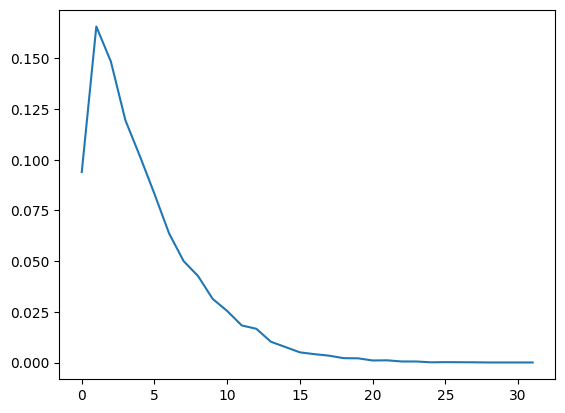

In [140]:
(predictions["diff"].round().value_counts().sort_index() / predictions.shape[0]).plot()

In [141]:
predictions

,actual,prediction,diff
DATE,,,
1990-01-12,50.0,59.391541,9.391541
1990-01-13,60.0,52.910567,7.089433
1990-01-14,70.0,60.115255,9.884745
1990-01-15,74.0,66.839003,7.160997
1990-01-16,76.0,68.573200,7.426800
...,...,...,...
2023-06-23,89.0,85.332392,3.667608
2023-06-24,93.0,89.464800,3.535200
2023-06-25,90.0,91.562452,1.562452
